# Results discussion

### This section summarize the output of all models and generate necessary plots/visualizations for the report.

In [32]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Directory containing the model log CSV files
model_logs_directory = "model_outputs_data"

# Paths to saved model output data (Training and Testing outputs of models)
training_log_files = {
    "ResNet50": "model_evaluation_logs/training_logs_resnet50.csv",
    "DenseNet121": "model_evaluation_logs/training_logs_densenet121.csv",
    "AlexNet": "model_evaluation_logs/training_logs_alexnet.csv",
    "InceptionV3": "model_evaluation_logs/training_logs_inceptionv3.csv",
    "InceptionV1": "model_evaluation_logs/training_logs_inceptionv1.csv",
    "EfficientNet": "model_evaluation_logs/training_logs_efficientnet.csv"
}

prediction_log_files = {
    "ResNet50": "model_prediction_logs/resnet50_labels_predictions.csv",
    "DenseNet121": "model_prediction_logs/densenet121_labels_predictions.csv",
    "AlexNet": "model_prediction_logs/alexnet_labels_predictions.csv",
    "InceptionV3": "model_prediction_logs/inceptionv3_labels_predictions.csv",
    "InceptionV1": "model_prediction_logs/inceptionv1_labels_predictions.csv",
    "EfficientNet": "model_prediction_logs/efficientnet_labels_predictions.csv"
}

## Plot Validation Loss

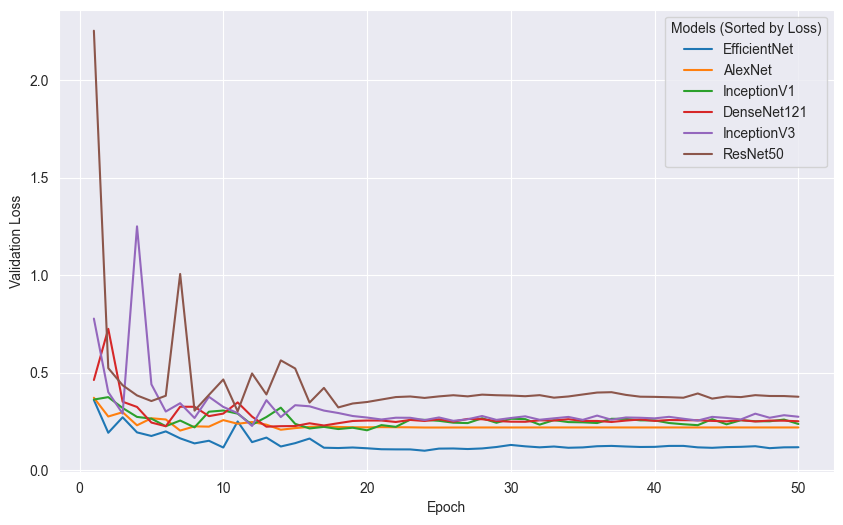

In [37]:
import pandas as pd
import os
import matplotlib.pyplot as plt

final_losses = {}

# Loop over each log file
for model_name, relative_path in training_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        # Load the CSV data
        log_data = pd.read_csv(file_path)
        
        # Get the final validation loss if available
        if "Validation_Loss" in log_data.columns:
            final_losses[model_name] = log_data["Validation_Loss"].iloc[-1]

# Sort models by final validation loss in ascending order
sorted_models = sorted(final_losses.items(), key=lambda x: x[1])

# Plot the validation loss in sorted order
plt.figure(figsize=(10, 6))
for model_name, _ in sorted_models:
    relative_path = training_log_files[model_name]
    file_path = os.path.join(model_logs_directory, relative_path)
    log_data = pd.read_csv(file_path)
    if "Validation_Loss" in log_data.columns:
        plt.plot(log_data["Epoch"], log_data["Validation_Loss"], label=model_name)

# Show the plot
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend(loc="upper right", title="Models (Sorted by Loss)")
plt.grid(True)

plt.show()


## Plot Training Accuracy

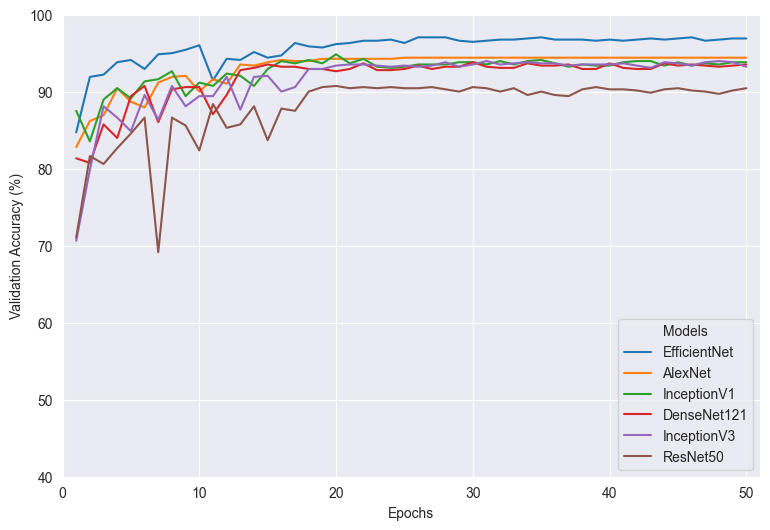

In [36]:
# dict to store final validation accuracy for sorting
final_accuracies = {}

# Loop each log file
for model_name, relative_path in training_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        # Load the CSV data
        log_data = pd.read_csv(file_path)
        
        # Get the final validation accuracy if available
        if "Validation_Accuracy" in log_data.columns:
            final_accuracies[model_name] = log_data["Validation_Accuracy"].iloc[-1]

# Sort models by validation accuracy 
sorted_models = sorted(final_accuracies.items(), key=lambda x: x[1], reverse=True)

# Plot the validation accuracy in sorted order
plt.figure(figsize=(9, 6))
for model_name, _ in sorted_models:
    relative_path = training_log_files[model_name]
    file_path = os.path.join(model_logs_directory, relative_path)
    log_data = pd.read_csv(file_path)
    if "Validation_Accuracy" in log_data.columns:
        plt.plot(log_data["Epoch"], log_data["Validation_Accuracy"], label=model_name)

# customize the plot
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy (%)")
plt.legend(loc="lower right", title="Models")
plt.grid(True)
plt.ylim(40, 100)
plt.xlim(0, 51)

plt.show()


## Model performance comparison table
- Total time spent was not logged in a file. It was taken directly from the Jupternotebook terminal output
- The max training accuracy for each model was considered as the training accuracy here

In [41]:
# Initialize dictionaries to store metrics
training_accuracy = {}
test_metrics = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1-Score": {}
}

# Iterate through each model's training log file to extract maximum training accuracy
for model_name, relative_path in training_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        log_data = pd.read_csv(file_path)
        # Extract the maximum training accuracy
        if "Validation_Accuracy" in log_data.columns:
            max_accuracy = log_data["Validation_Accuracy"].max()
            training_accuracy[model_name] = max_accuracy
        else:
            training_accuracy[model_name] = None 
    else:
        training_accuracy[model_name] = None 

# Extract test metrics from prediction logs
for model_name, relative_path in prediction_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        prediction_data = pd.read_csv(file_path)
        if "true_labels" in prediction_data.columns and "predicted_labels" in prediction_data.columns:
            true_labels = prediction_data["true_labels"]
            predicted_labels = prediction_data["predicted_labels"]
            # Calculate metrics
            test_metrics["Accuracy"][model_name] = accuracy_score(true_labels, predicted_labels) * 100
            test_metrics["Precision"][model_name] = precision_score(true_labels, predicted_labels, average="binary")
            test_metrics["Recall"][model_name] = recall_score(true_labels, predicted_labels, average="binary")
            test_metrics["F1-Score"][model_name] = f1_score(true_labels, predicted_labels, average="binary")
        else:
            for metric in test_metrics:
                test_metrics[metric][model_name] = None 
    else:
        for metric in test_metrics:
            test_metrics[metric][model_name] = None

# Data
model_arr = ["ResNet50", "DenseNet121", "AlexNet", "InceptionV3", "InceptionV1", "EfficientNet"]

data = {
    "Model": model_arr,
    "Layers": [151, 121, 24, 307, 224, 335],
    "Total Parameters (Millions)": [23.51, 7.97, 57.01, 25.11, 5.60, 4.01],
    "Training Time (seconds)": [1974.02, 1904.06, 1527.48, 2359.06, 1311.59, 1646.64],
    "GFLOPS": [0.71, 3.79, 4.13, 1.51, 2.85, 0.53],
    "Training Accuracy (%)": [round(training_accuracy.get(model, "N/A"), 2) if training_accuracy.get(model) != "N/A" else "N/A" for model in model_arr],
    "Test Accuracy (%)": [round(test_metrics["Accuracy"].get(model, "N/A"), 2) if test_metrics["Accuracy"].get(model) != "N/A" else "N/A" for model in model_arr],
    "Precision": [round(test_metrics["Precision"].get(model, "N/A"), 2) if test_metrics["Precision"].get(model) != "N/A" else "N/A" for model in model_arr],
    "Recall": [round(test_metrics["Recall"].get(model, "N/A"), 2) if test_metrics["Recall"].get(model) != "N/A" else "N/A" for model in model_arr],
    "F1-Score": [round(test_metrics["F1-Score"].get(model, "N/A"), 2) if test_metrics["F1-Score"].get(model) != "N/A" else "N/A" for model in model_arr]
}

# Print data
df = pd.DataFrame(data)
print(df)

          Model  Layers  Total Parameters (Millions)  Training Time (seconds)  \
0      ResNet50     151                        23.51                  1974.02   
1   DenseNet121     121                         7.97                  1904.06   
2       AlexNet      24                        57.01                  1527.48   
3   InceptionV3     307                        25.11                  2359.06   
4   InceptionV1     224                         5.60                  1311.59   
5  EfficientNet     335                         4.01                  1646.64   

   GFLOPS  Training Accuracy (%)  Test Accuracy (%)  Precision  Recall  \
0    0.71                  90.75              90.06       0.93    0.87   
1    3.79                  93.83              93.21       0.94    0.92   
2    4.13                  94.42              93.63       0.94    0.94   
3    1.51                  93.98              93.76       0.96    0.92   
4    2.85                  94.86              94.93       0.96

## Print all confusion matrix in one plot

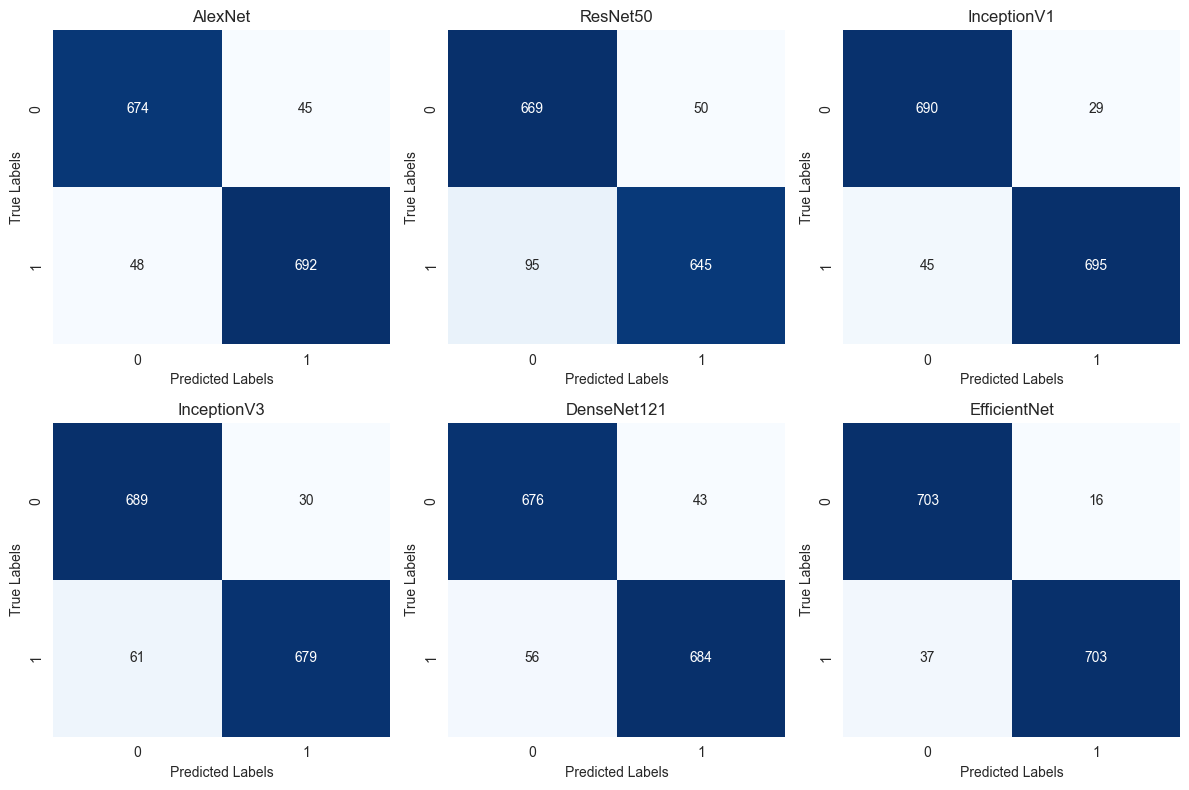

In [28]:
confusion_matrices = {}
fontsize = 8

# Calculate confusion matrices for each model
for model_name, relative_path in prediction_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        # Load predictions
        data = pd.read_csv(file_path)
        if "true_labels" in data.columns and "predicted_labels" in data.columns:
            true_labels = data["true_labels"]
            predicted_labels = data["predicted_labels"]

            # Compute confusion matrix
            cm = confusion_matrix(true_labels, predicted_labels)
            confusion_matrices[model_name] = cm

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()  # Flatten to handle all axes uniformly

for idx, (model_name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[idx])
    axes[idx].set_title(f"{model_name}")
    axes[idx].set_xlabel("Predicted Labels" )
    axes[idx].set_ylabel("True Labels" )

plt.tight_layout()
plt.show()


## Prepare AUC plot

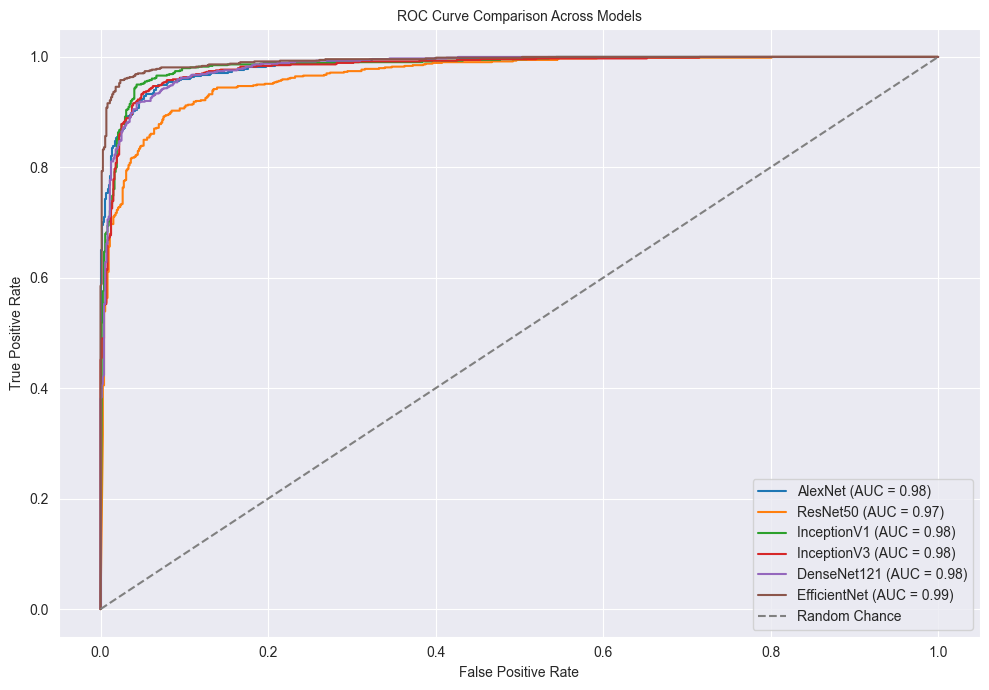

In [29]:
# Initialize a dictionary to store AUC data
roc_curves = {}
fontsize = 10

# Calculate ROC curves and AUC for each model
for model_name, relative_path in prediction_log_files.items():
    file_path = os.path.join(model_logs_directory, relative_path)
    if os.path.exists(file_path):
        # Load predictions
        data = pd.read_csv(file_path)
        if "true_labels" in data.columns and "positive_probabilities" in data.columns:
            true_labels = data["true_labels"]
            probabilities = data["positive_probabilities"]

            # Compute ROC curve and AUC
            fpr, tpr, _ = roc_curve(true_labels, probabilities)
            roc_auc = auc(fpr, tpr)
            roc_curves[model_name] = (fpr, tpr, roc_auc)

# Plot all ROC curves
plt.figure(figsize=(10, 7))
for model_name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot random chance line
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Chance")

# Customize the plot
plt.title("ROC Curve Comparison Across Models", fontsize=fontsize)
plt.xlabel("False Positive Rate", fontsize=fontsize)
plt.ylabel("True Positive Rate", fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
